In [65]:
import numpy as np
import scipy.fft as sf
import scipy.signal as ss
import matplotlib.pyplot as plt
%matplotlib widget
import scipy

scipy.__version__

# random seed to have same result
np.random.seed(0)

Discrete Fourier transforms always have a normalization that revolves around the number of elements in the time series. SciPy also allows you to change the normalization convention via the 
[norm parameter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html).
The following study consists of finding this normalization via the property of white noise.

# Spectrum of white noise

We will assume here that an independent random draw from a normal law of variance V constitutes white noise whose spectrum has a constant value equal to V, see [ref](https://en.wikipedia.org/wiki/White_noise#White_noise_vector).


In [66]:
np.random.seed(5)
nb_s = 10000
sigma = 4
noise = np.random.normal(0, sigma, nb_s)
print("Variance of the noise: ", np.var(noise))

Variance of the noise:  16.027210892098655


## Spectrum as FFT*conj(FFT)

###  norm="backward" 

It's the defalut normalization for `rfft()` function.

mean spectrum:  160280.44403362
variance spectrum : 165610.11987683852, relative to mean : 1.0332521904050913


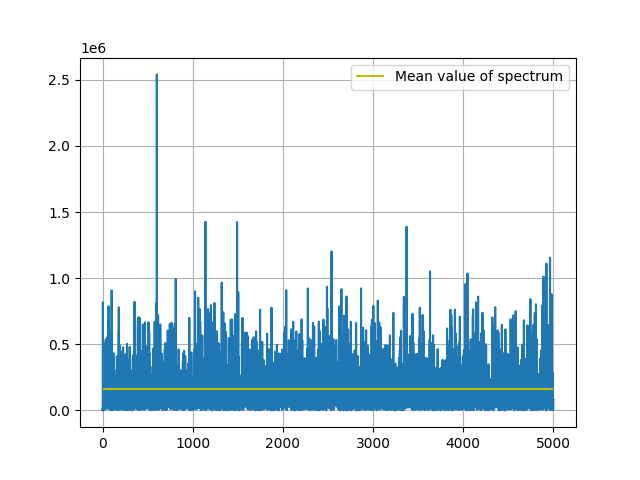

In [67]:
noise_rfft = sf.rfft(noise, norm="backward")
noise_ps = (noise_rfft*np.conj(noise_rfft)).real

m_spec = np.mean(noise_ps[1:])
print("mean spectrum: ",m_spec)
std_spec = np.std(noise_ps[1:])
print(f"variance spectrum : {std_spec}, relative to mean : {std_spec/m_spec}" )

plt.figure()
plt.plot(noise_ps)
plt.hlines(m_spec,0, len(noise_ps), color="y",label="Mean value of spectrum")
plt.legend()
plt.grid()

The spectrum seems very noisy for a constant value. Average to see if a structure appears or if it is flat.

160280.44403362
17202.50148426333
0.10732751327201827


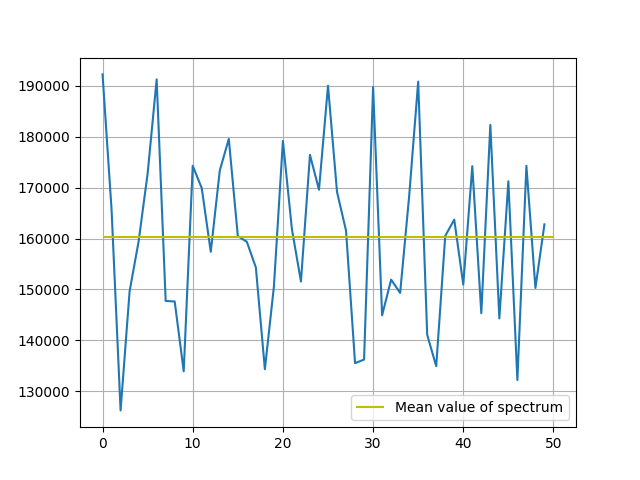

In [68]:
ps_stack =  noise_ps[1:].reshape(-1,100).mean(axis=-1)
print(ps_stack.mean())
print(ps_stack.std())
print(ps_stack.std()/ps_stack.mean())

plt.figure()
plt.plot(ps_stack)
plt.hlines(m_spec,0, len(ps_stack),  color="y",label="Mean value of spectrum")
plt.legend()
plt.grid()

So it's pretty flat with still some oscillations.
Now let's look the mean value of spectrum, around 160,000 and the length of time serie is 10,000.

### Conclusion

With "backward" normalization, the Fourier mode computed by `rfft()` are **multiply** by the square root of the number of sample in time serie.




### norm="forward"

(5001,)
Variance estimée sans normalisation 0.0016028044403362002
Variance estimée avec normalisation *n_sample:  16.028044403362


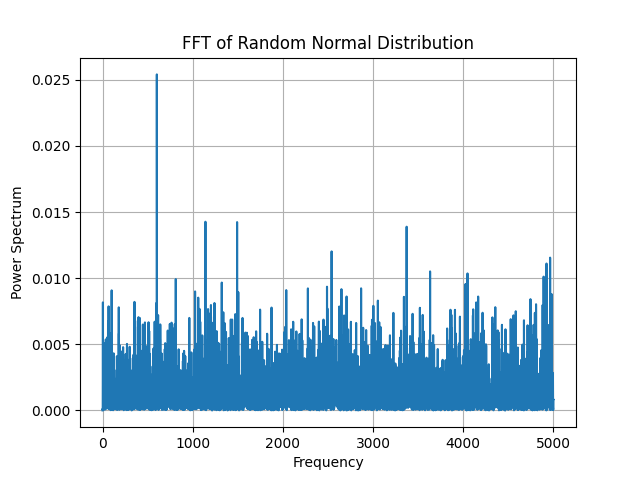

In [70]:
noise_rfft = sf.rfft(noise, norm="forward")
# rescale the FFT output to get the power spectrum
noise_ps = (noise_rfft*np.conj(noise_rfft)).real
plt.figure()
plt.plot(noise_ps)
plt.title('FFT of Random Normal Distribution')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.grid()
print(noise_ps.shape)

print("Variance estimée sans normalisation",np.mean(noise_ps[1:]))
print("Variance estimée avec normalisation *n_sample: ", np.mean(noise_ps[1:]*nb_s))

### Conclusion

With "backward" normalization, the Fourier mode computed by `rfft()` are **divide** by the square root of the number of sample in time serie.

